In [288]:
import numpy as np
import skimage 
from skimage import io, color

In [308]:
def converter(arr):
    new_arr = np.zeros(arr.shape)
    for x in range(arr.shape[0]):
        for y in range(arr.shape[1]):
            r = arr[x][y][0] / 255
            g = arr[x][y][1] / 255
            b = arr[x][y][2] / 255
            cmax = max(r, g, b)
            cmin = min(r, g, b)
            diff = cmax - cmin
            if diff == 0: 
                new_arr[x][y][0] = 0
            elif cmax == r:
                new_arr[x][y][0] = 30 * (((g - b) / diff) % 6)
            elif cmax == g:
                new_arr[x][y][0] = 30 * ((b - r) / diff + 2)
            elif cmax == b:
                new_arr[x][y][0] = 30 * ((r - g) / diff + 4)
            new_arr[x][y][2] = cmax * 255
            if cmax == 0:
                new_arr[x][y][1] = 0
            else:
                new_arr[x][y][1] = (diff / cmax) * 255
    new_arr = new_arr.astype('uint8')
    return np.clip(new_arr, 0, 255)

In [275]:
dog = io.imread('dogg.jpg')

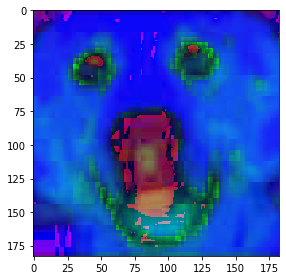

In [309]:
io.imshow(converter(dog))

In [289]:
newdog = color.rgb2hsv(dog)

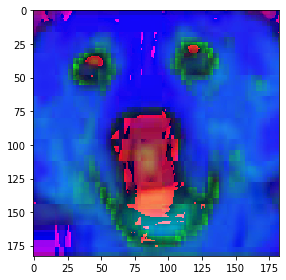

In [270]:
io.imshow(newdog)

In [277]:
newdog

array([[[0.54444444, 0.11450382, 0.51372549],
        [0.55952381, 0.10606061, 0.51764706],
        [0.57692308, 0.09774436, 0.52156863],
        ...,
        [0.61111111, 0.02189781, 0.5372549 ],
        [0.        , 0.        , 0.53333333],
        [0.11111111, 0.02097902, 0.56078431]],

       [[0.54444444, 0.11450382, 0.51372549],
        [0.55952381, 0.10606061, 0.51764706],
        [0.57692308, 0.09774436, 0.52156863],
        ...,
        [0.61111111, 0.02173913, 0.54117647],
        [0.        , 0.        , 0.5372549 ],
        [0.11111111, 0.02083333, 0.56470588]],

       [[0.54444444, 0.11538462, 0.50980392],
        [0.55952381, 0.10687023, 0.51372549],
        [0.54545455, 0.08461538, 0.50980392],
        ...,
        [0.61111111, 0.02189781, 0.5372549 ],
        [0.        , 0.        , 0.5372549 ],
        [0.11111111, 0.02097902, 0.56078431]],

       ...,

       [[0.66666667, 0.01098901, 0.71372549],
        [0.66666667, 0.01098901, 0.71372549],
        [0.66666667, 0

**Task 2**

In [136]:
import matplotlib.pyplot as plt

In [144]:
def contr_bright(arr, contrast, brightness):
    contr = contrast
    bright = brightness
    arr = arr.astype('uint8')
    new_arr = np.zeros(arr.shape, arr.dtype)
    con = np.ones((arr.shape[0], arr.shape[1], arr.shape[2])) * contr
    bri = np.zeros((arr.shape[0], arr.shape[1], arr.shape[2])) + bright
    new_arr = np.clip(arr * con + bri, 0, 255)
    new_arr = new_arr.astype('uint8')
    return new_arr

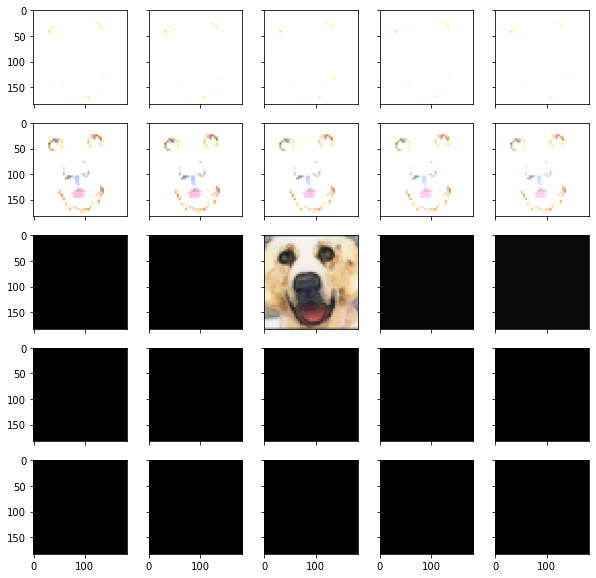

In [145]:
f, ax = plt.subplots(5, 5, sharex = True, sharey = True, figsize=(10,10))
ax[0, 0].imshow(contr_bright(dog, 10, -10))
ax[0, 1].imshow(contr_bright(dog, 10, -5))
ax[0, 2].imshow(contr_bright(dog, 10, 0))
ax[0, 3].imshow(contr_bright(dog, 10, 5))
ax[0, 4].imshow(contr_bright(dog, 10, 10))
ax[1, 0].imshow(contr_bright(dog, 5, -10))
ax[1, 1].imshow(contr_bright(dog, 5, -10))
ax[1, 2].imshow(contr_bright(dog, 5, 0))
ax[1, 3].imshow(contr_bright(dog, 5, 5))
ax[1, 4].imshow(contr_bright(dog, 5, 10))
ax[2, 0].imshow(contr_bright(dog, 0, -10))
ax[2, 1].imshow(contr_bright(dog, 0, -5))
ax[2, 2].imshow(dog)
ax[2, 3].imshow(contr_bright(dog, 0, 5))
ax[2, 4].imshow(contr_bright(dog, 0, 10))
ax[3, 0].imshow(contr_bright(dog, -5, -10))
ax[3, 1].imshow(contr_bright(dog, -5, -5))
ax[3, 2].imshow(contr_bright(dog, -5, 0))
ax[3, 3].imshow(contr_bright(dog, -5, 5))
ax[3, 4].imshow(contr_bright(dog, -5, 10))
ax[4, 0].imshow(contr_bright(dog, -10, -10))
ax[4, 1].imshow(contr_bright(dog, -10, -5))
ax[4, 2].imshow(contr_bright(dog, -10, 0))
ax[4, 3].imshow(contr_bright(dog, -10, 5))
ax[4, 4].imshow(contr_bright(dog, -10, 10))

**Task 3**

In [235]:
from skimage.metrics import structural_similarity as ssim

Text(0.5, 0, '0.9814608972499546')

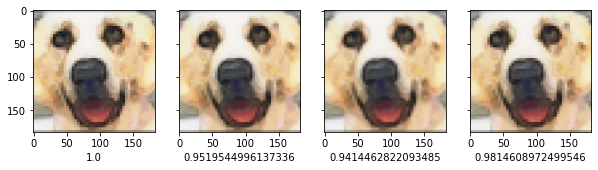

In [256]:
im, ax = plt.subplots(1, 4, sharey = True, figsize=(10, 15))
ax[0].imshow(dog)
ax[0].set_xlabel(ssim(dog, dog, multichannel=True))
ax[1].imshow(cv2.medianBlur(dog, 3))
ax[1].set_xlabel(ssim(dog, cv2.medianBlur(dog, 3), multichannel=True))
ax[2].imshow(cv2.GaussianBlur(dog, (3,3), 0))
ax[2].set_xlabel(ssim(dog, cv2.GaussianBlur(dog, (3,3), 0), multichannel=True))
ax[3].imshow(cv2.bilateralFilter(dog, 3, 75, 75))
ax[3].set_xlabel(ssim(dog, cv2.bilateralFilter(dog, 3, 75, 75), multichannel=True))